# Network model (MLP)

In [69]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Imports

In [70]:
import os

import numpy as np
import pandas as pd
import torch
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from src.data.dataset import MovieDataset
from src.utils.const import DATA_DIR, SEED

### Useful path to data

In [71]:
ROOT_DIR = os.path.join(os.getcwd(), '..')
PROCESSED_DIR = os.path.join(ROOT_DIR, DATA_DIR, 'processed')

### Repeatability

In [72]:
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.use_deterministic_algorithms(True)

## Import final dataset

In [73]:
df = pd.read_parquet(os.path.join(PROCESSED_DIR, 'final.parquet'))

## Work with Dataset

In [74]:
dataset = MovieDataset(df)

In [75]:
samples = np.arange(len(dataset))
train_idx_tmp, test_idx = train_test_split(samples, test_size=0.2, stratify=dataset.y)
train_idx, val_idx = train_test_split(train_idx_tmp, test_size=0.1, stratify=dataset.y[train_idx_tmp])

### Scaler

In [76]:
def overview(data):
    train_data = data.X[train_idx]
    test_data = data.X[test_idx]
    val_data = data.X[val_idx]

    plt.scatter(
        train_data[:, dataset.map_columns['year']],
        train_data[:, dataset.map_columns['title_length']],
        c='r'
    )
    plt.scatter(
        test_data[:, dataset.map_columns['year']],
        test_data[:, dataset.map_columns['title_length']],
        c='g'
    )
    plt.scatter(
        val_data[:, dataset.map_columns['year']],
        val_data[:, dataset.map_columns['title_length']],
        c='b'
    )

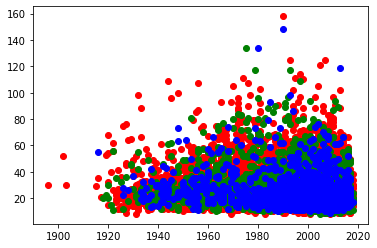

In [77]:
overview(dataset)

In [78]:
scaler = MinMaxScaler()
features = [
    dataset.map_columns['year'],
    dataset.map_columns['title_length'],
    dataset.map_columns['runtime'],
    dataset.map_columns['rating_count']
]
dataset.scale(train_idx, test_idx, val_idx, scaler, features)

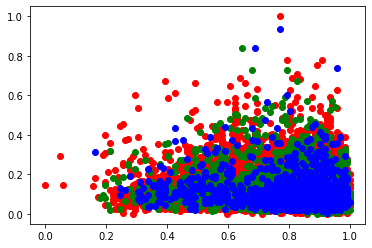

In [79]:
overview(dataset)

### Normalization

In [80]:
def overview_norm(data):
    train_data = data.X[train_idx]

    plt.scatter(
        train_data[:, dataset.map_columns['year']],
        train_data[:, dataset.map_columns['title_length']],
        c='r'
    )

In [81]:
dataset.normalize(train_idx)

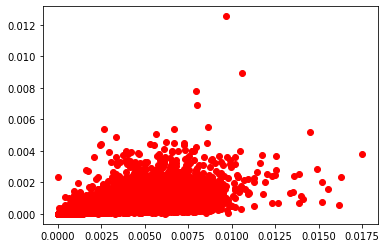

In [82]:
overview_norm(dataset)